In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/DATA/body_data2.csv')
df.head(3)

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI,체중분류
0,8,10,F001,161.4,136.1,80.1,119.8,94.2,73.2,41.6,...,9.2,7.8,62.9,32.8,F,37,7.8,30,24.145910,비만
1,8,10,F002,168.1,140.4,84.7,123.3,107.0,77.3,45.2,...,9.2,7.0,56.1,31.5,F,26,2.7,20,19.853059,비만
2,8,10,F003,163.4,138.2,81.9,120.6,97.1,74.8,42.3,...,9.7,7.6,53.2,25.2,F,39,8.0,30,19.925422,정상체중


# 상관관계 분석

In [6]:
correlation_matrix = df.corr()
correlation_with_bodyfat = correlation_matrix['체지방율'].sort_values(ascending=False)
top_8_correlated = correlation_with_bodyfat[1:9]
bottom_5_correlated = correlation_with_bodyfat[-5:]
print("체지방율과 상관관계가 가장 높은 상위 10개 컬럼:")
print(top_8_correlated)
print("\n체지방율과 상관관계가 가장 낮은 하위 5개 컬럼:")
print(bottom_5_correlated)

체지방율과 상관관계가 가장 높은 상위 10개 컬럼:
배꼽수준허리둘레    0.467737
BMI         0.417361
엉덩이둘레       0.386573
나이          0.337647
나이대         0.335541
허리둘레        0.334522
젖가슴둘레       0.287900
측정일         0.164837
Name: 체지방율, dtype: float64

체지방율과 상관관계가 가장 낮은 하위 5개 컬럼:
손직선길이   -0.445282
겨드랑높이   -0.475868
엉덩이높이   -0.476954
샅높이     -0.499145
키       -0.569835
Name: 체지방율, dtype: float64


<ipython-input-6-9ba9ae291de3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [123]:
data = pd.read_csv('/content/drive/MyDrive/DATA/body_data2.csv')
data.head(3)

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI,체중분류
0,8,10,F001,161.4,136.1,80.1,119.8,94.2,73.2,41.6,...,9.2,7.8,62.9,32.8,F,37,7.8,30,24.145910,비만
1,8,10,F002,168.1,140.4,84.7,123.3,107.0,77.3,45.2,...,9.2,7.0,56.1,31.5,F,26,2.7,20,19.853059,비만
2,8,10,F003,163.4,138.2,81.9,120.6,97.1,74.8,42.3,...,9.7,7.6,53.2,25.2,F,39,8.0,30,19.925422,정상체중


In [125]:
data = data.drop(['측정월','측정일','모델번호','나이대'],axis=1)
data.head(3)

,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,머리둘레,목둘레,젖가슴둘레,...,손직선길이,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,BMI,체중분류
0,161.4,136.1,80.1,119.8,94.2,73.2,41.6,55.5,35.2,90.6,...,16.0,9.2,7.8,62.9,32.8,F,37,7.8,24.145910,비만
1,168.1,140.4,84.7,123.3,107.0,77.3,45.2,54.7,31.8,88.5,...,17.0,9.2,7.0,56.1,31.5,F,26,2.7,19.853059,비만
2,163.4,138.2,81.9,120.6,97.1,74.8,42.3,52.0,30.5,84.5,...,16.9,9.7,7.6,53.2,25.2,F,39,8.0,19.925422,정상체중


# Feature 고른 후 데이터프레임 생성
- [1] 측정월, 측정일, 모델번호 제외한 모든 컬럼 데이터 프레임 생성
- [2] 상위 10개, 하위 5개, 성별인 컬럼으로 이뤄진 데이터 프레임 생성
- 중요하다 생각하는 feature로 만든 데이터 프레임 2개 생성
  - [3] : ['키', '목둘레', '젖가슴둘레', '허리둘레', '배꼽수준허리둘레', '엉덩이둘레', '넙다리둘레', '무릎둘레', '장딴지둘레', '종아리최소둘레', '발목둘레', '편위팔둘레', '편팔꿈치둘레', '손목둘레', '어깨사이너비', '몸무게', '나이', '성별','BMI','체지방율']
  - [4] : ['키', '목둘레', '배꼽수준허리둘레', '엉덩이둘레','편위팔둘레', '넙다리둘레','어깨사이너비', '성별', '나이', '몸무게', '체지방율']

- df : 원본 데이터프레임
- body : [1] 데이터프레임
- corr : [2] 데이터프레임
- test1 : [3] 데이터프레임
- test2 : [4] 데이터프레임

In [7]:
corr_col = ['배꼽수준허리둘레', 'BMI', '엉덩이둘레', '나이', '나이대', '허리둘레', '젖가슴둘레', '넙다리둘레', '허리높이', '목뒤높이', '겨드랑높이', '키', '샅높이', '성별', '체지방율']
test1_col = ['키', '목둘레', '젖가슴둘레', '허리둘레', '배꼽수준허리둘레', '엉덩이둘레', '넙다리둘레', '무릎둘레', '장딴지둘레', '종아리최소둘레', '발목둘레', '편위팔둘레', '편팔꿈치둘레', '손목둘레', '어깨사이너비', '몸무게', '나이', '성별','BMI','체지방율']
test2_col = ['키', '목둘레', '배꼽수준허리둘레', '엉덩이둘레','편위팔둘레', '넙다리둘레','어깨사이너비', '성별', '나이', '몸무게', '체지방율']

In [8]:
body = df.drop(['측정월','측정일','모델번호'],axis=1)
corr = df[corr_col]
test1 = df[test1_col]
test2 = df[test2_col]

# 정규화 & 인코딩
- z-score 정규화

In [9]:
from sklearn.preprocessing import StandardScaler

def SScaler(df):
  col = df.select_dtypes(include=['int64','float64']).columns
  scaler = StandardScaler()
  df[col] = scaler.fit_transform(df[col])

  return df

- min-max 정규화

In [10]:
from sklearn.preprocessing import MinMaxScaler

def MinMax(df):
  col = df.select_dtypes(include=['int64','float64']).columns
  scaler = MinMaxScaler()
  df[col] = scaler.fit_transform(df[col])

  return df

- one-hot 인코딩

In [11]:
def OneHot(df):
  col = df.select_dtypes(include=['object'])
  col_name = col.columns

  df = pd.get_dummies(df, columns=col_name)

  return df

- Zscore & OneHot

In [12]:
def EncoderStandardScaler(df):
    col_num = df.select_dtypes(include=['int64', 'float64']).columns
    col_name = df.select_dtypes(include=['object']).columns

    scaler = StandardScaler()

    df_copy = df.copy()

    df_copy[col_num] = scaler.fit_transform(df_copy[col_num])
    df_copy = pd.get_dummies(df_copy, columns=col_name)

    return df_copy

- MinMax & OneHot

In [13]:
def EncoderMinMaxScaler(df):
    col_num = df.select_dtypes(include=['int64', 'float64']).columns
    col_name = df.select_dtypes(include=['object']).columns

    scaler = MinMaxScaler()

    df_copy = df.copy()

    df_copy[col_num] = scaler.fit_transform(df_copy[col_num])
    df_copy = pd.get_dummies(df_copy, columns=col_name)

    return df_copy

- train & test split

In [14]:
X = df.drop('체지방율', axis=1)
y = df['체지방율']

In [15]:
body_X = body.drop('체지방율',axis=1)
body_y = body['체지방율']

corr_X = corr.drop('체지방율',axis=1)
corr_y = body['체지방율']

test1_X = test1.drop('체지방율',axis=1)
test1_y = test1['체지방율']

test2_X = test2.drop('체지방율',axis=1)
test2_y = test2['체지방율']

In [126]:
data_X = data.drop('체지방율',axis=1)
data_y = data['체지방율']

- 편위팔둘레 빼고 다 정규화를 따르지 않음

In [127]:
normalized = ['키','목뒤높이','엉덩이높이','겨드랑높이','허리높이','샅높이','무릎높이','머리둘레','목둘레',
              '젖가슴둘레','허리둘레','배꼽수준허리둘레','엉덩이둘레','넙다리둘레','무릎둘레','장딴지둘레',
              '종아리최소둘레','발목둘레','편팔꿈치둘레','손목둘레', '위팔길이','팔길이','어깨사이너비','머리수직길이',
              '얼굴수직길이','발크기','발너비','얼굴너비','손직선길이','손바닥직선길이','손안쪽가쪽직선길이',
              '몸무게','체지방율','나이','신발굽높이','BMI']

In [132]:
from sklearn.preprocessing import RobustScaler

def RS(df):
    col_num = df.select_dtypes(include=['int64', 'float64']).columns
    col_name = df.select_dtypes(include=['object']).columns

    scaler = RobustScaler()

    df_copy = df.copy()

    df_copy[col_num] = scaler.fit_transform(df_copy[col_num])
    df_copy = pd.get_dummies(df_copy, columns=col_name)

    return df_copy

In [133]:
scaled_data = RS(data_X)

In [134]:
# Robust 정규화
Robust_Onehot_scaled_data = OneHot(scaled_data)
Robust_Onehot_scaled_data.head(3)

,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,머리둘레,목둘레,젖가슴둘레,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,나이,신발굽높이,BMI,성별_F,성별_M,체중분류_비만,체중분류_정상체중
0,-0.222649,-0.136919,0.132780,-0.175258,-0.787671,0.202335,-0.224490,-0.391304,0.131455,-0.021505,...,-1.000000,-0.125,0.005944,-0.461538,2.533333,0.182646,1,0,1,0
1,0.291747,0.283619,0.896266,0.185567,0.965753,0.840467,0.510204,-0.739130,-0.507042,-0.247312,...,-1.000000,-1.125,-0.398217,-0.884615,-0.866667,-0.806470,1,0,1,0
2,-0.069098,0.068460,0.431535,-0.092784,-0.390411,0.451362,-0.081633,-1.913043,-0.751174,-0.677419,...,-0.444444,-0.375,-0.570579,-0.384615,2.666667,-0.789797,1,0,0,1


- One-Hot 인코딩만

In [48]:
n_body = OneHot(body_X)
n_corr = OneHot(corr_X)
n_test1 = OneHot(test1_X)
n_test2 = OneHot(test2_X)

- Z-score & One-Hot 인코딩

In [16]:
z_body = EncoderStandardScaler(body_X)
z_body.head(3)

,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,머리둘레,목둘레,젖가슴둘레,...,손안쪽가쪽직선길이,몸무게,나이,신발굽높이,나이대,BMI,성별_F,성별_M,체중분류_비만,체중분류_정상체중
0,-0.399298,-0.136372,0.147085,-0.163839,-0.208219,0.222509,-0.295072,-0.561773,0.099775,-0.000249,...,-0.085126,-0.109069,-0.733525,3.153040,-0.898537,0.191257,1,0,1,0
1,0.384855,0.216796,1.123827,0.300671,0.186047,0.981671,0.403415,-1.031484,-0.889537,-0.261221,...,-0.293448,-0.682493,-1.455434,-1.078560,-1.556806,-1.127011,1,0,1,0
2,-0.165222,0.036105,0.529288,-0.057666,-0.118893,0.518767,-0.159255,-2.616756,-1.267803,-0.758310,...,-0.137206,-0.927042,-0.602269,3.318985,-0.898537,-1.104789,1,0,0,1


In [17]:
z_corr = EncoderStandardScaler(corr_X)
z_corr.head(3)

,배꼽수준허리둘레,BMI,엉덩이둘레,나이,나이대,허리둘레,젖가슴둘레,넙다리둘레,허리높이,목뒤높이,겨드랑높이,키,샅높이,성별_F,성별_M
0,-0.114273,0.191257,0.964572,-0.733525,-0.898537,0.062043,-0.000249,0.530473,-0.208219,-0.136372,-0.163839,-0.399298,0.222509,1,0
1,-0.342149,-1.127011,-0.291902,-1.455434,-1.556806,-0.572746,-0.261221,-0.592071,0.186047,0.216796,0.300671,0.384855,0.981671,1,0
2,-0.570024,-1.104789,-1.015326,-0.602269,-0.898537,-0.354212,-0.758310,-0.354914,-0.118893,0.036105,-0.057666,-0.165222,0.518767,1,0


In [18]:
z_test1 = EncoderStandardScaler(test1_X)
z_test1.head(3)

,키,목둘레,젖가슴둘레,허리둘레,배꼽수준허리둘레,엉덩이둘레,넙다리둘레,무릎둘레,장딴지둘레,종아리최소둘레,발목둘레,편위팔둘레,편팔꿈치둘레,손목둘레,어깨사이너비,몸무게,나이,BMI,성별_F,성별_M
0,-0.399298,0.099775,-0.000249,0.062043,-0.114273,0.964572,0.530473,0.917689,0.697780,-0.018211,0.254923,-0.189727,-0.025782,0.728808,-0.4283,-0.109069,-0.733525,0.191257,1,0
1,0.384855,-0.889537,-0.261221,-0.572746,-0.342149,-0.291902,-0.592071,0.089935,-0.138726,-0.459695,-0.208679,-1.136164,-0.726979,-1.671132,-0.4283,-0.682493,-1.455434,-1.127011,1,0
2,-0.165222,-1.267803,-0.758310,-0.354212,-0.570024,-1.015326,-0.354914,-1.193083,-0.506789,-0.901179,-0.788181,-1.203766,-1.643929,-1.206628,-0.4283,-0.927042,-0.602269,-1.104789,1,0


In [19]:
z_test2 = EncoderStandardScaler(test2_X)
z_test2.head(3)

,키,목둘레,배꼽수준허리둘레,엉덩이둘레,편위팔둘레,넙다리둘레,어깨사이너비,나이,몸무게,성별_F,성별_M
0,-0.399298,0.099775,-0.114273,0.964572,-0.189727,0.530473,-0.4283,-0.733525,-0.109069,1,0
1,0.384855,-0.889537,-0.342149,-0.291902,-1.136164,-0.592071,-0.4283,-1.455434,-0.682493,1,0
2,-0.165222,-1.267803,-0.570024,-1.015326,-1.203766,-0.354914,-0.4283,-0.602269,-0.927042,1,0


- Min-Max & One-Hot 인코딩

In [20]:
m_body = EncoderMinMaxScaler(body_X)
m_body.head(3)

,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,머리둘레,목둘레,젖가슴둘레,...,손안쪽가쪽직선길이,몸무게,나이,신발굽높이,나이대,BMI,성별_F,성별_M,체중분류_비만,체중분류_정상체중
0,0.420705,0.271332,0.238983,0.820513,0.018637,0.599095,0.070845,0.304965,0.174014,0.760849,...,0.018041,0.527829,0.283333,0.309091,0.166667,0.656699,1,0,1,0
1,0.568282,0.282518,0.316949,0.852564,0.030997,0.636199,0.103542,0.248227,0.095128,0.741459,...,0.007732,0.464750,0.100000,0.077273,0.000000,0.525342,1,0,1,0
2,0.464758,0.276795,0.269492,0.827839,0.021437,0.613575,0.077203,0.056738,0.064965,0.704524,...,0.015464,0.437848,0.316667,0.318182,0.166667,0.527556,1,0,0,1


In [21]:
m_corr = EncoderMinMaxScaler(corr_X )
m_corr.head(3)

,배꼽수준허리둘레,BMI,엉덩이둘레,나이,나이대,허리둘레,젖가슴둘레,넙다리둘레,허리높이,목뒤높이,겨드랑높이,키,샅높이,성별_F,성별_M
0,0.373606,0.656699,0.709278,0.283333,0.166667,0.436620,0.760849,0.372240,0.018637,0.271332,0.820513,0.420705,0.599095,1,0
1,0.338290,0.525342,0.573196,0.100000,0.000000,0.341158,0.741459,0.260252,0.030997,0.282518,0.852564,0.568282,0.636199,1,0
2,0.302974,0.527556,0.494845,0.316667,0.166667,0.374022,0.704524,0.283912,0.021437,0.276795,0.827839,0.464758,0.613575,1,0


In [22]:
m_test1 = EncoderMinMaxScaler(test1_X)
m_test1.head(3)

,키,목둘레,젖가슴둘레,허리둘레,배꼽수준허리둘레,엉덩이둘레,넙다리둘레,무릎둘레,장딴지둘레,종아리최소둘레,발목둘레,편위팔둘레,편팔꿈치둘레,손목둘레,어깨사이너비,몸무게,나이,BMI,성별_F,성별_M
0,0.420705,0.174014,0.760849,0.436620,0.373606,0.709278,0.372240,0.486755,0.613861,0.050066,0.671429,0.500000,0.442478,0.695652,0.414474,0.527829,0.283333,0.656699,1,0
1,0.568282,0.095128,0.741459,0.341158,0.338290,0.573196,0.260252,0.420530,0.551980,0.034256,0.614286,0.370370,0.327434,0.471014,0.414474,0.464750,0.100000,0.525342,1,0
2,0.464758,0.064965,0.704524,0.374022,0.302974,0.494845,0.283912,0.317881,0.524752,0.018445,0.542857,0.361111,0.176991,0.514493,0.414474,0.437848,0.316667,0.527556,1,0


In [23]:
m_test2 = EncoderMinMaxScaler(test2_X)
m_test2.head(3)

,키,목둘레,배꼽수준허리둘레,엉덩이둘레,편위팔둘레,넙다리둘레,어깨사이너비,나이,몸무게,성별_F,성별_M
0,0.420705,0.174014,0.373606,0.709278,0.500000,0.372240,0.414474,0.283333,0.527829,1,0
1,0.568282,0.095128,0.338290,0.573196,0.370370,0.260252,0.414474,0.100000,0.464750,1,0
2,0.464758,0.064965,0.302974,0.494845,0.361111,0.283912,0.414474,0.316667,0.437848,1,0


# 모델학습
## Random Forest Regressor

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import randint as sp_randint
from sklearn.model_selection import cross_val_score

In [25]:
def RFR(X, y, best_params):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  rfr = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_split=best_params['min_samples_split'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              random_state=42)

  rfr.fit(X_train, y_train)

  y_pred = rfr.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2_score = rfr.score(X_test, y_test)

  n = X_test.shape[0]
  p = X_test.shape[1]
  adjusted_r2 = 1 - (1-r2_score)*(n-1)/(n-p-1)

  rmse = np.sqrt(mse)

  return [mse, mae, r2_score, adjusted_r2, rmse]

In [49]:
best_params = {
    'n_estimators': 500,
    'max_depth': None,
    'min_samples_split': 11,
    'min_samples_leaf': 5
}

result = [RFR(n_body, body_y, best_params), RFR(n_corr, corr_y, best_params),
          RFR(n_test1, test1_y, best_params), RFR(n_test2, test2_y, best_params)]

n_results_rfr = pd.DataFrame(result, columns=['mse', 'mae', 'r2_score', 'adjusted_r2', 'rmse'])
n_results_rfr.index = ['z_body', 'z_corr','z_test1','z_test2']

n_results_rfr

,mse,mae,r2_score,adjusted_r2,rmse
z_body,7.098053,2.160201,0.844921,0.804678,2.664217
z_corr,11.220174,2.721021,0.754860,0.734875,3.349653
z_test1,10.822487,2.659328,0.763548,0.737129,3.289755
z_test2,11.464918,2.732324,0.749513,0.734856,3.385988


In [26]:
best_params = {
    'n_estimators': 500,
    'max_depth': None,
    'min_samples_split': 11,
    'min_samples_leaf': 5
}

result = [RFR(z_body, body_y, best_params), RFR(z_corr, corr_y, best_params),
          RFR(z_test1, test1_y, best_params), RFR(z_test2, test2_y, best_params)]

z_results_rfr = pd.DataFrame(result, columns=['mse', 'mae', 'r2_score', 'adjusted_r2', 'rmse'])
z_results_rfr.index = ['z_body', 'z_corr','z_test1','z_test2']

z_results_rfr

,mse,mae,r2_score,adjusted_r2,rmse
z_body,7.096471,2.159818,0.844955,0.804722,2.663920
z_corr,11.214780,2.718969,0.754978,0.735003,3.348848
z_test1,10.825568,2.658208,0.763481,0.737054,3.290223
z_test2,11.454606,2.732916,0.749738,0.735095,3.384465


In [27]:
best_params = {
    'n_estimators': 500,
    'max_depth': None,
    'min_samples_split': 11,
    'min_samples_leaf': 5
}

result = [RFR(m_body, body_y, best_params), RFR(m_corr, corr_y, best_params),
          RFR(m_test1, test1_y, best_params), RFR(m_test2, test2_y, best_params)]

m_results_rfr = pd.DataFrame(result, columns=['mse', 'mae', 'r2_score', 'adjusted_r2', 'rmse'])
m_results_rfr.index = ['m_body', 'm_corr','m_test1','m_test2']

m_results_rfr

,mse,mae,r2_score,adjusted_r2,rmse
m_body,7.123353,2.161988,0.844368,0.803982,2.668961
m_corr,11.211324,2.720096,0.755053,0.735085,3.348332
m_test1,10.829272,2.659511,0.763400,0.736964,3.290786
m_test2,11.459880,2.731967,0.749623,0.734973,3.385244


In [138]:
def GBR(X,y,best_params):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    gbr = GradientBoostingRegressor(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_split=best_params['min_samples_split'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              random_state=42)

    gbr.fit(X_train, y_train)

    y_pred = gbr.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2_score = gbr.score(X_test, y_test)

    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1-r2_score)*(n-1)/(n-p-1)

    rmse = np.sqrt(mse)

    return [mse, mae, r2_score, adjusted_r2, rmse]

In [50]:
best_params = {
    'n_estimators' : 200,
    'max_depth' : 3,
    'min_samples_split' : 2,
    'min_samples_leaf' : 1,
    'random_state' : 42
}

result = [GBR(n_body, body_y, best_params), GBR(n_corr, corr_y, best_params),
          GBR(n_test1, test1_y, best_params), GBR(n_test2, test2_y, best_params)]

n_results_gbr = pd.DataFrame(result, columns=['mse', 'mae', 'r2_score', 'adjusted_r2', 'rmse'])
n_results_gbr.index = ['z_body', 'z_corr','z_test1','z_test2']

n_results_gbr

,mse,mae,r2_score,adjusted_r2,rmse
z_body,7.005917,2.123958,0.846934,0.807214,2.646869
z_corr,11.891030,2.717460,0.740203,0.719024,3.448337
z_test1,10.781598,2.625500,0.764442,0.738122,3.283534
z_test2,12.395181,2.834210,0.729188,0.713343,3.520679


In [30]:
best_params = {
    'n_estimators' : 200,
    'max_depth' : 3,
    'min_samples_split' : 2,
    'min_samples_leaf' : 1,
    'random_state' : 42
}

result = [GBR(z_body, body_y, best_params), GBR(z_corr, corr_y, best_params),
          GBR(z_test1, test1_y, best_params), GBR(z_test2, test2_y, best_params)]

z_results_gbr = pd.DataFrame(result, columns=['mse', 'mae', 'r2_score', 'adjusted_r2', 'rmse'])
z_results_gbr.index = ['z_body', 'z_corr','z_test1','z_test2']

z_results_gbr

,mse,mae,r2_score,adjusted_r2,rmse
z_body,6.997577,2.118980,0.847116,0.807443,2.645293
z_corr,11.887436,2.715531,0.740281,0.719109,3.447816
z_test1,10.776810,2.624196,0.764546,0.738239,3.282805
z_test2,12.445749,2.838708,0.728083,0.712173,3.527853


In [31]:
best_params = {
    'n_estimators' : 200,
    'max_depth' : 3,
    'min_samples_split' : 2,
    'min_samples_leaf' : 1,
    'random_state' : 42
}
result = [GBR(m_body, body_y, best_params), GBR(m_corr, corr_y, best_params),
          GBR(m_test1, test1_y, best_params), GBR(m_test2, test2_y, best_params)]

m_results_gbr = pd.DataFrame(result, columns=['mse', 'mae', 'r2_score', 'adjusted_r2', 'rmse'])
m_results_gbr.index = ['m_body', 'm_corr','m_test1','m_test2']

m_results_gbr

,mse,mae,r2_score,adjusted_r2,rmse
m_body,7.011386,2.122265,0.846814,0.807063,2.647902
m_corr,11.984249,2.724923,0.738166,0.716821,3.461827
m_test1,10.824244,2.624975,0.763510,0.737087,3.290022
m_test2,12.409467,2.835538,0.728876,0.713012,3.522707


In [ ]:
best_params = {
    'n_estimators' : 200,
    'max_depth' : 3,
    'min_samples_split' : 2,
    'min_samples_leaf' : 1,
    'random_state' : 42
}
result = [GBR(m_body, body_y, best_params), GBR(m_corr, corr_y, best_params),
          GBR(m_test1, test1_y, best_params), GBR(m_test2, test2_y, best_params)]

m_results_gbr = pd.DataFrame(result, columns=['mse', 'mae', 'r2_score', 'adjusted_r2', 'rmse'])
m_results_gbr.index = ['m_body', 'm_corr','m_test1','m_test2']

m_results_gbr

In [51]:
matrix = [list(n_results_rfr['r2_score']),list(z_results_rfr['r2_score']),list(m_results_rfr['r2_score']),list(n_results_gbr['r2_score']),list(z_results_gbr['r2_score']),list(m_results_gbr['r2_score'])]
matrix

[[0.8449205373236609,
  0.7548597319450963,
  0.7635484714356608,
  0.7495125281901075],
 [0.8449550858500081,
  0.7549775741749558,
  0.7634811544327291,
  0.7497378291227734],
 [0.8443677791005091,
  0.7550530841343723,
  0.7634002256577511,
  0.7496225916425554],
 [0.846933529422021,
  0.740202767049891,
  0.7644418210766375,
  0.7291879798487672],
 [0.8471157585597188,
  0.7402812782287513,
  0.7645464158671762,
  0.7280831613765308],
 [0.8468140497234888,
  0.7381660932193653,
  0.7635100867598235,
  0.7288758542504828]]

In [55]:
conclusion_r2 = pd.DataFrame(matrix, columns=['body', 'corr','test1','test2'])
conclusion_r2.index = ['n_rfr','z_rfr', 'm_rfr','n_gbr','z_gbr','m_gbr']
conclusion_r2

,body,corr,test1,test2
n_rfr,0.844921,0.754860,0.763548,0.749513
z_rfr,0.844955,0.754978,0.763481,0.749738
m_rfr,0.844368,0.755053,0.763400,0.749623
n_gbr,0.846934,0.740203,0.764442,0.729188
z_gbr,0.847116,0.740281,0.764546,0.728083
m_gbr,0.846814,0.738166,0.763510,0.728876


In [139]:
# Robust 스케일링 한 결과값 mse, mae, r2-score, r2-score adjusted, rmse
example = GBR(Robust_Onehot_scaled_data, data_y, best_params)
example

[7.040052034647842,
 2.1313576017153735,
 0.846187747034027,
 0.8074928406274929,
 2.653309637914098]

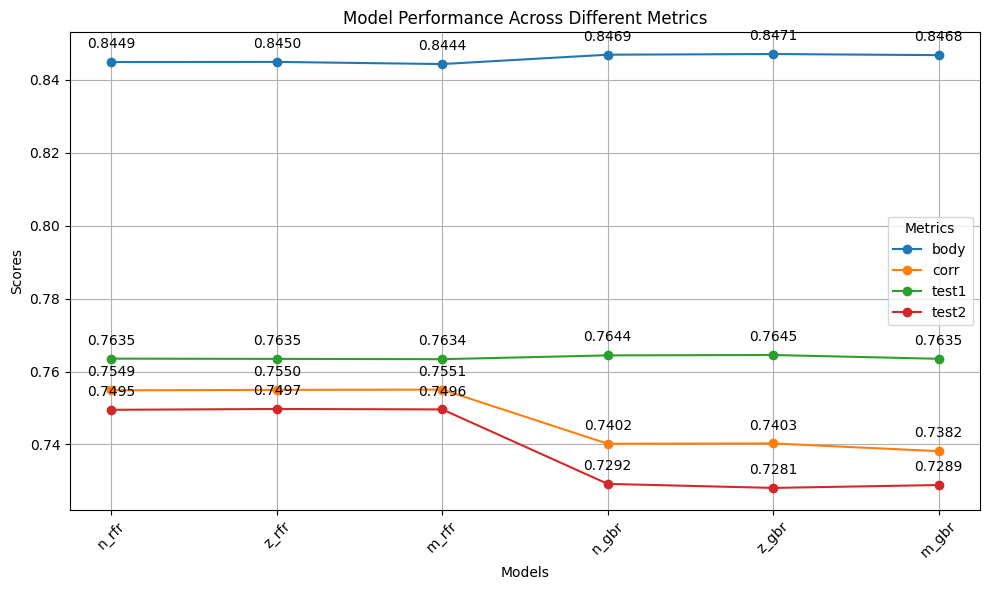

In [64]:
plt.figure(figsize=(10, 6))
for column in conclusion_r2.columns:
    plt.plot(conclusion_r2.index, conclusion_r2[column], marker='o', label=column)
    for i, txt in enumerate(conclusion_r2[column]):
        plt.annotate(f"{txt:.4f}", (conclusion_r2.index[i], conclusion_r2[column][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Model Performance Across Different Metrics')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(title='Metrics')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

- '측정월','측정일','모델번호'를 제외하고 모든 컬럼을 사용한 데이터의 결과가 가장 좋게 나왔으며 이 데이터 프레임에는 z-score 정규화를 진행하고, Gradient Boosting Regressor의 모델이 적합한 것으로 보인다.


# z_body, body_y 데이터, 최적이 파라미터로 학습 진행

In [65]:
random_params = {
    'n_estimators' : 120,
    'max_depth' : 40,
    'min_samples_split' : 8,
    'min_samples_leaf' : 3,
    'random_state' : 42
}

grid_params = {
    'n_estimators' : 100,
    'max_depth' : 10,
    'min_samples_split' : 11,
    'min_samples_leaf' : 5,
    'random_state' : 42
}

best_params = {
    'n_estimators' : 200,
    'max_depth' : 3,
    'min_samples_split' : 2,
    'min_samples_leaf' : 1,
    'random_state' : 42
}

In [66]:
result = [GBR(z_body, body_y, random_params), GBR(z_body, body_y, grid_params),
          GBR(z_body, body_y, best_params)]

params_results = pd.DataFrame(result, columns=['mse', 'mae', 'r2_score', 'adjusted_r2', 'rmse'])
params_results.index = ['random_params', 'grid_params','best_params']

params_results

,mse,mae,r2_score,adjusted_r2,rmse
random_params,7.830479,2.240224,0.828918,0.784524,2.798299
grid_params,7.491393,2.133492,0.836327,0.793855,2.737041
best_params,6.997577,2.118980,0.847116,0.807443,2.645293


In [136]:
result_robust = [GBR(Robust_Onehot_scaled_data, data_y, random_params), GBR(Robust_Onehot_scaled_data, data_y, grid_params),
          GBR(Robust_Onehot_scaled_data, data_y, best_params)]
result_robust

Mean Squared Error (MSE): 7.980775705326117
Mean Absolute Error (MAE): 2.2719461688720335
R-squared (R²): 0.8256346564470078

     Actual  Predicted
521    34.3  32.301792
737    25.6  30.792936
740    25.4  28.909132
660    20.8  15.901080
411    22.7  27.387600
Mean Squared Error (MSE): 7.442942117974488
Mean Absolute Error (MAE): 2.134939056896656
R-squared (R²): 0.8373853360420151

     Actual  Predicted
521    34.3  30.897375
737    25.6  29.228436
740    25.4  28.088168
660    20.8  16.643480
411    22.7  25.734594
Mean Squared Error (MSE): 7.040052034647842
Mean Absolute Error (MAE): 2.1313576017153735
R-squared (R²): 0.846187747034027

     Actual  Predicted
521    34.3  29.784684
737    25.6  29.800462
740    25.4  26.422423
660    20.8  17.773251
411    22.7  24.340910


[None, None, None]

In [140]:
result_robust = [GBR(Robust_Onehot_scaled_data, data_y, random_params), GBR(Robust_Onehot_scaled_data, data_y, grid_params),
          GBR(Robust_Onehot_scaled_data, data_y, best_params)]

robust_params_results = pd.DataFrame(result_robust, columns=['mse', 'mae', 'r2_score', 'adjusted_r2', 'rmse'])
robust_params_results = ['random_params', 'grid_params','best_params']

params_results

,mse,mae,r2_score,adjusted_r2,rmse
random_params,7.830479,2.240224,0.828918,0.784524,2.798299
grid_params,7.491393,2.133492,0.836327,0.793855,2.737041
best_params,6.997577,2.118980,0.847116,0.807443,2.645293


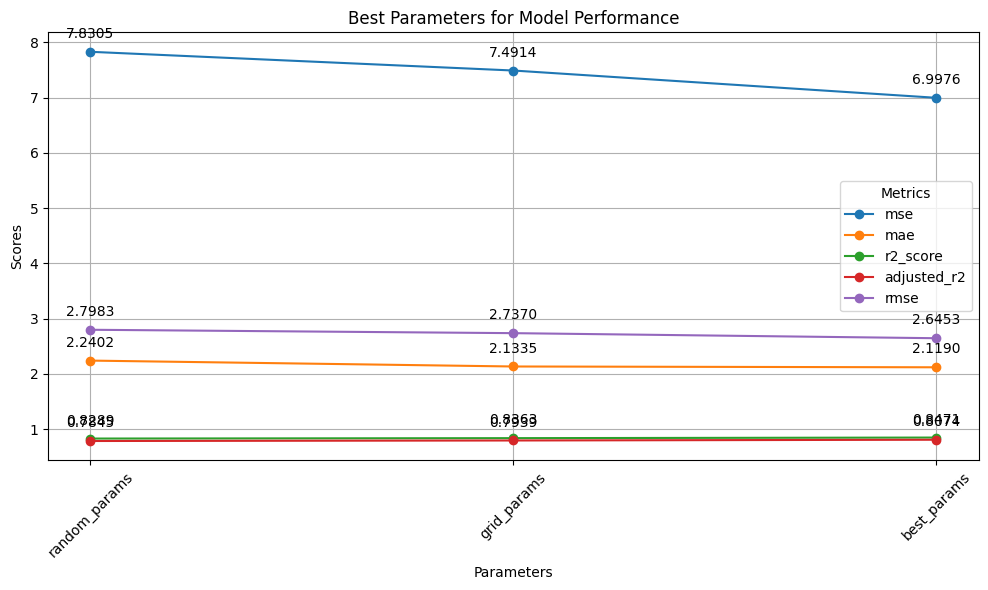

In [67]:
plt.figure(figsize=(10, 6))
for column in params_results.columns:
    plt.plot(params_results.index, params_results[column], marker='o', label=column)
    for i, txt in enumerate(params_results[column]):
        plt.annotate(f"{txt:.4f}", (params_results.index[i], params_results[column][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Best Parameters for Model Performance')
plt.xlabel('Parameters')
plt.ylabel('Scores')
plt.legend(title='Metrics')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

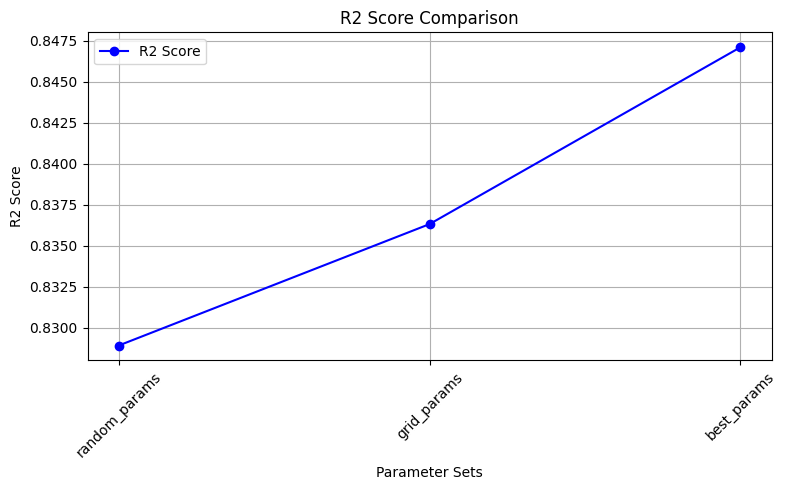

In [68]:
plt.figure(figsize=(8, 5))
plt.plot(params_results.index, params_results["r2_score"], marker='o', linestyle='-', color='b', label='R2 Score')
plt.title('R2 Score Comparison')
plt.xlabel('Parameter Sets')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

- best_params로 진행했을 때 값이 가장 좋음

---
---

- 값 비교하려고 n_body, m_body 그래프 그린 것임

In [69]:
result = [GBR(n_body, body_y, random_params), GBR(n_body, body_y, grid_params),
          GBR(n_body, body_y, best_params)]

t1_params_results = pd.DataFrame(result, columns=['mse', 'mae', 'r2_score', 'adjusted_r2', 'rmse'])
t1_params_results.index = ['random_params', 'grid_params','best_params']

t1_params_results

,mse,mae,r2_score,adjusted_r2,rmse
random_params,7.820158,2.240613,0.829144,0.784808,2.796454
grid_params,7.441726,2.124129,0.837412,0.795221,2.727953
best_params,7.005917,2.123958,0.846934,0.807214,2.646869


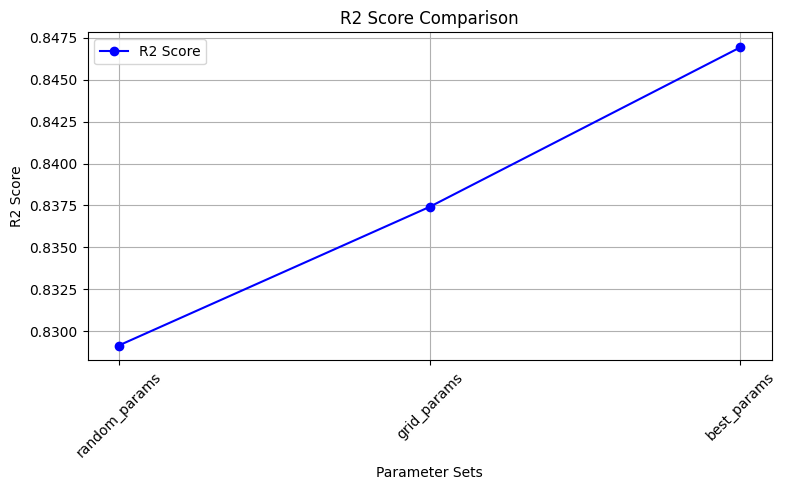

In [70]:
plt.figure(figsize=(8, 5))
plt.plot(t1_params_results.index, t1_params_results["r2_score"], marker='o', linestyle='-', color='b', label='R2 Score')
plt.title('R2 Score Comparison')
plt.xlabel('Parameter Sets')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [71]:
result = [GBR(m_body, body_y, random_params), GBR(m_body, body_y, grid_params),
          GBR(m_body, body_y, best_params)]

t2_params_results = pd.DataFrame(result, columns=['mse', 'mae', 'r2_score', 'adjusted_r2', 'rmse'])
t2_params_results.index = ['random_params', 'grid_params','best_params']

t2_params_results

,mse,mae,r2_score,adjusted_r2,rmse
random_params,7.867106,2.253073,0.828118,0.783516,2.804836
grid_params,7.550795,2.133888,0.835029,0.792220,2.747871
best_params,7.011386,2.122265,0.846814,0.807063,2.647902


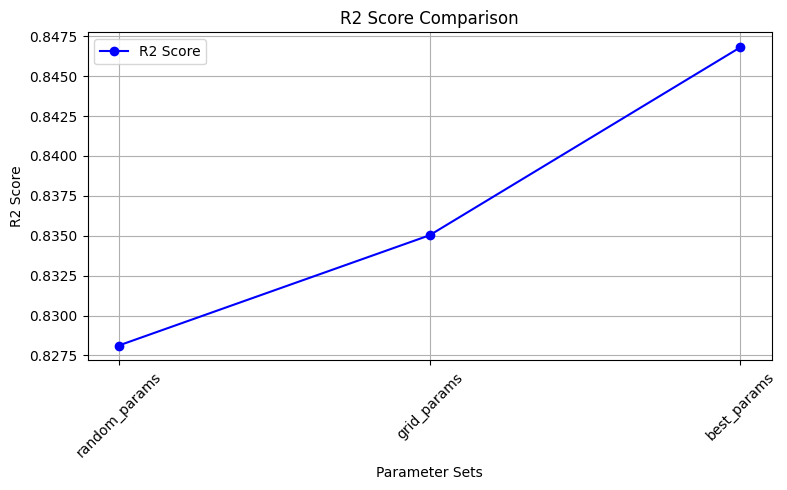

In [72]:
plt.figure(figsize=(8, 5))
plt.plot(t2_params_results.index, t2_params_results["r2_score"], marker='o', linestyle='-', color='b', label='R2 Score')
plt.title('R2 Score Comparison')
plt.xlabel('Parameter Sets')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Feature 분석

In [73]:
def feature(df):
  X = df.drop('체지방율',axis=1)
  y = df['체지방율']
  names = df.columns

  rf = RandomForestRegressor()
  rf.fit(X,y)
  rf_importances = rf.feature_importances_

  gb = GradientBoostingRegressor()
  gb.fit(X, y)
  gb_importances = gb.feature_importances_

  body_rf_importance_names = sorted(zip(rf_importances, names), reverse=True)[:10]
  body_gb_importance_names = sorted(zip(gb_importances, names), reverse=True)[:10]

  print("Random Forest Feature Importances:")
  for importance, name in body_rf_importance_names:
    print(f"{name}: {importance}")

  print("\nGradient Boosting Feature Importances:")
  for importance, name in body_gb_importance_names:
    print(f"{name}: {importance}")

In [79]:
X = z_body
y = body_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(**best_params)

gbr.fit(X_train, y_train)
feature_importances = gbr.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

print("Feature Importances:\n", feature_importance_series)

Feature Importances:
 체중분류_비만      0.280902
체중분류_정상체중    0.226506
성별_M         0.095642
성별_F         0.095466
BMI          0.057606
배꼽수준허리둘레     0.043407
키            0.028728
허리둘레         0.019931
엉덩이둘레        0.015617
샅높이          0.015315
어깨사이너비       0.011618
젖가슴둘레        0.010036
목뒤높이         0.008705
넙다리둘레        0.007425
발크기          0.006922
편위팔둘레        0.006594
발너비          0.006009
무릎둘레         0.005412
겨드랑높이        0.004718
편팔꿈치둘레       0.004602
종아리최소둘레      0.004338
손안쪽가쪽직선길이    0.004198
장딴지둘레        0.003781
발목둘레         0.003772
목둘레          0.003696
나이           0.002919
엉덩이높이        0.002790
팔길이          0.002720
몸무게          0.002555
얼굴수직길이       0.002475
신발굽높이        0.002367
무릎높이         0.002152
위팔길이         0.002090
손목둘레         0.001809
허리높이         0.001435
머리둘레         0.001373
머리수직길이       0.001341
손바닥직선길이      0.001312
얼굴너비         0.000893
손직선길이        0.000540
나이대          0.000282
dtype: float64


In [82]:
feature = feature_importance_series[:12]
feature.index

Index(['체중분류_비만', '체중분류_정상체중', '성별_M', '성별_F', 'BMI', '배꼽수준허리둘레', '키', '허리둘레',
       '엉덩이둘레', '샅높이', '어깨사이너비', '젖가슴둘레'],
      dtype='object')

# 영향을 많이 미친 것으로 보이는 feature만 가지고 학습 진행 후, 예측 비교

In [84]:
top12_feature = feature.index

new_df = z_body[top12_feature]
new_df.head(3)

,체중분류_비만,체중분류_정상체중,성별_M,성별_F,BMI,배꼽수준허리둘레,키,허리둘레,엉덩이둘레,샅높이,어깨사이너비,젖가슴둘레
0,1,0,0,1,0.191257,-0.114273,-0.399298,0.062043,0.964572,0.222509,-0.4283,-0.000249
1,1,0,0,1,-1.127011,-0.342149,0.384855,-0.572746,-0.291902,0.981671,-0.4283,-0.261221
2,0,1,0,1,-1.104789,-0.570024,-0.165222,-0.354212,-1.015326,0.518767,-0.4283,-0.758310


In [86]:
GBR(new_df,body_y, best_params)

[7.594438892635423,
 2.1698860338698167,
 0.8340754087697457,
 0.8234278414180717,
 2.755800953014463]

- R2 score :0.8340754087697457으로 기존의 것보다 성능이 좋지 않음

# 결론
- feature : '측정월','측정일','모델번호' 제외 모든 컬럼 사용
- 정규화 & 표준화 & 인코딩 : 예측값 제외 z-score, object type 원-핫 인코딩
- 모델 : Gradient Boosting Regressor
- 파라미터 : best_params 사용

위의 조건을 만족한 학습의 성능이 가장 좋다.

In [96]:
X = z_body
y = body_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators = 200,
                                max_depth = 3,
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                random_state = 42)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = gbr.score(X_test, y_test)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1-r2_score)*(n-1)/(n-p-1)

rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2_score)
print()

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

Mean Squared Error (MSE): 6.9975765536400445
Mean Absolute Error (MAE): 2.1189798379243117
R-squared (R²): 0.8471157585597188

     Actual  Predicted
521    34.3  29.997930
737    25.6  29.800462
740    25.4  26.422423
660    20.8  17.773251
411    22.7  24.340910


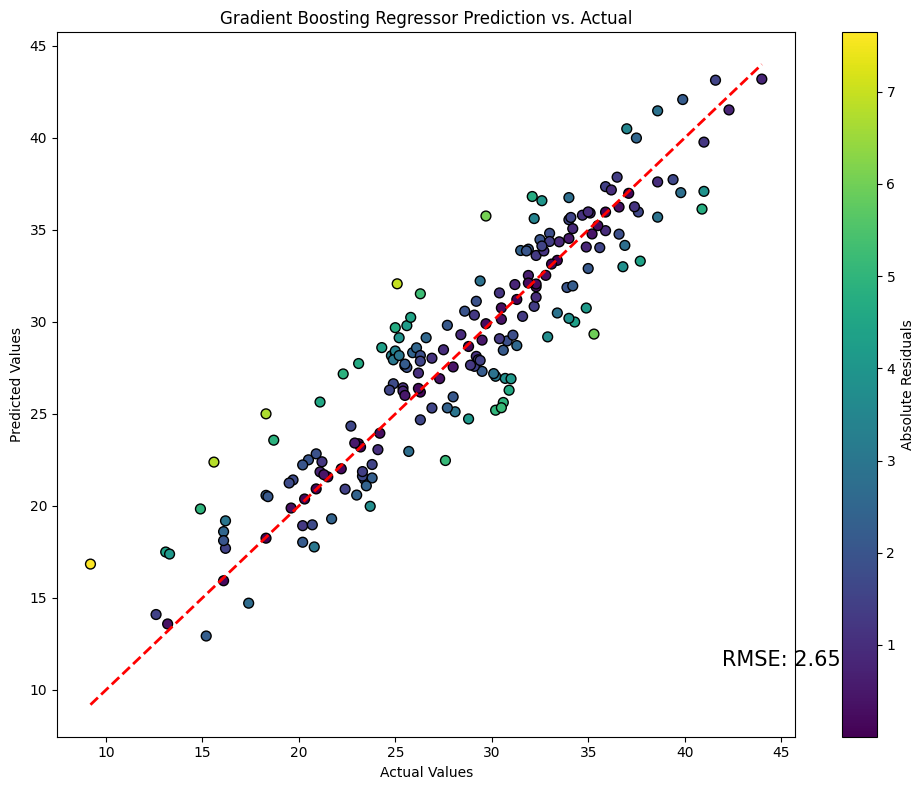

In [113]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(y_test, y_pred, c=abs(y_test - y_pred), cmap='viridis', edgecolor='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

cbar = plt.colorbar(scatter)
cbar.set_label('Absolute Residuals')

plt.text(0.9, 0.1, f'RMSE: {rmse:.2f}', fontsize=15, transform=plt.gca().transAxes)

plt.title('Gradient Boosting Regressor Prediction vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

In [97]:
comparison_df

,Actual,Predicted
521,34.3,29.997930
737,25.6,29.800462
740,25.4,26.422423
660,20.8,17.773251
411,22.7,24.340910
...,...,...
408,39.4,37.736355
332,26.9,28.030586
208,27.7,25.330454
613,26.6,29.143172


In [103]:
index_col = comparison_df.index
index_col

Int64Index([521, 737, 740, 660, 411, 678, 626, 513, 859, 136,
            ...
            948, 829, 656, 199, 213, 408, 332, 208, 613,  78],
           dtype='int64', length=200)

In [111]:
gender = []
for i in index_col:
  gender.append(df.loc[i,'성별_F'])

comparison_df['Gender'] = gender
comparison_df

,Actual,Predicted,Gender
521,34.3,29.997930,0
737,25.6,29.800462,0
740,25.4,26.422423,0
660,20.8,17.773251,0
411,22.7,24.340910,1
...,...,...,...
408,39.4,37.736355,1
332,26.9,28.030586,1
208,27.7,25.330454,1
613,26.6,29.143172,0


In [116]:
comparison_df['diff'] = comparison_df['Actual']-comparison_df['Predicted']
comparison_df

,Actual,Predicted,Gender,diff
521,34.3,29.997930,0,4.302070
737,25.6,29.800462,0,-4.200462
740,25.4,26.422423,0,-1.022423
660,20.8,17.773251,0,3.026749
411,22.7,24.340910,1,-1.640910
...,...,...,...,...
408,39.4,37.736355,1,1.663645
332,26.9,28.030586,1,-1.130586
208,27.7,25.330454,1,2.369546
613,26.6,29.143172,0,-2.543172


In [118]:
print(comparison_df['diff'].max())
print(comparison_df['diff'].min())

5.958995804117176
-7.641928096088268


- 성별에 따라 건강한 체지방 범위가 다른데, 위의 결과를 보고선

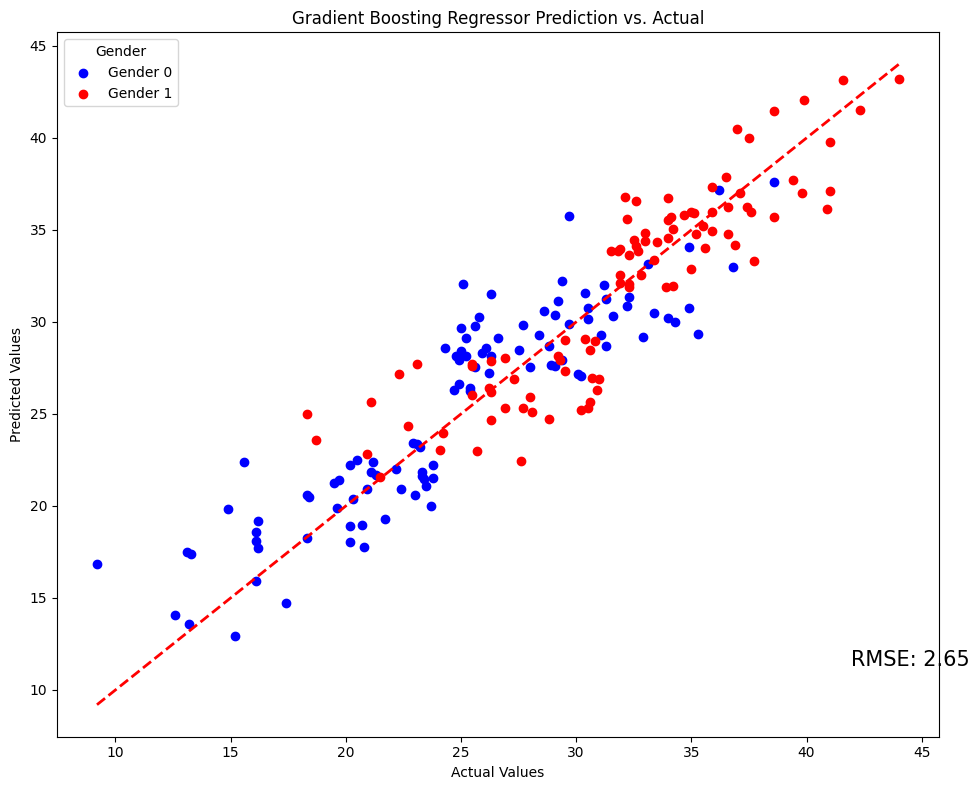

In [114]:
colors = {0: 'blue', 1: 'red'}

grouped = comparison_df.groupby('Gender')

rmse = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Predicted']))

plt.figure(figsize=(10, 8))
for key, group in grouped:
    plt.scatter(group['Actual'], group['Predicted'], label=f'Gender {key}', color=colors[key])

plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 'r--', lw=2)

plt.text(0.9, 0.1, f'RMSE: {rmse:.2f}', fontsize=15, transform=plt.gca().transAxes)

plt.title('Gradient Boosting Regressor Prediction vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

In [119]:
df.columns

Index(['키', '목뒤높이', '엉덩이높이', '겨드랑높이', '허리높이', '샅높이', '무릎높이', '머리둘레', '목둘레',
       '젖가슴둘레', '허리둘레', '배꼽수준허리둘레', '엉덩이둘레', '넙다리둘레', '무릎둘레', '장딴지둘레',
       '종아리최소둘레', '발목둘레', '편위팔둘레', '편팔꿈치둘레', '손목둘레', '위팔길이', '팔길이', '어깨사이너비',
       '머리수직길이', '얼굴수직길이', '발크기', '발너비', '얼굴너비', '손직선길이', '손바닥직선길이',
       '손안쪽가쪽직선길이', '몸무게', '나이', '신발굽높이', '나이대', 'BMI', '성별_F', '성별_M',
       '체중분류_비만', '체중분류_정상체중'],
      dtype='object')

# Backward Elimination

In [149]:
import statsmodels.api as sm

def backward_elimination(data, target, significance_level = 0.05):
    features = data.columns.tolist()
    while len(features) > 0:
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:] # 첫 번째 p-value는 절편을 위한 것
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

X = z_body
y = body_y

selected_features = backward_elimination(X, y)
print(selected_features)

['키', '목둘레', '허리둘레', '배꼽수준허리둘레', '엉덩이둘레', '무릎둘레', '손목둘레', '어깨사이너비', '발크기', '발너비', '손안쪽가쪽직선길이', '성별_F', '성별_M', '체중분류_비만', '체중분류_정상체중']


In [159]:
data_col = z_body.columns
for s in selected_features:
  col2 = list(data_col)
  col2.remove(s)

  X = z_body[col2]
  y = body_y

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  gbr = GradientBoostingRegressor(n_estimators = 200,
                                  max_depth = 3,
                                  min_samples_split = 2,
                                  min_samples_leaf = 1,
                                  random_state = 42)

  gbr.fit(X_train, y_train)

  y_pred = gbr.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2_score = gbr.score(X_test, y_test)

  n = X_test.shape[0]
  p = X_test.shape[1]
  adjusted_r2 = 1 - (1-r2_score)*(n-1)/(n-p-1)

  rmse = np.sqrt(mse)

  print("Mean Squared Error (MSE):", mse)
  print("Mean Absolute Error (MAE):", mae)
  print("R-squared (R²):", r2_score)
  print()

Mean Squared Error (MSE): 7.320944820031834
Mean Absolute Error (MAE): 2.1735620003055898
R-squared (R²): 0.8400507537349483

Mean Squared Error (MSE): 6.96370544300604
Mean Absolute Error (MAE): 2.077305344378185
R-squared (R²): 0.8478557803395914

Mean Squared Error (MSE): 6.988972986967512
Mean Absolute Error (MAE): 2.1131758149535584
R-squared (R²): 0.8473037307461362

Mean Squared Error (MSE): 7.0799638894635235
Mean Absolute Error (MAE): 2.103540355314799
R-squared (R²): 0.8453157460489437

Mean Squared Error (MSE): 6.917251730880273
Mean Absolute Error (MAE): 2.1311590571268515
R-squared (R²): 0.8488707089346545

Mean Squared Error (MSE): 7.298729329514601
Mean Absolute Error (MAE): 2.169315503600808
R-squared (R²): 0.8405361215462064

Mean Squared Error (MSE): 7.063253856018701
Mean Absolute Error (MAE): 2.147099228820916
R-squared (R²): 0.8456808296987002

Mean Squared Error (MSE): 7.014126090956167
Mean Absolute Error (MAE): 2.123012531693334
R-squared (R²): 0.846754181456650

- 발너비 삭제했을 때 가장 좋았음

In [160]:
# 코드를 수정하여 각 반복에서 선택된 특성들을 순차적으로 제거하면서 모델을 학습하고 평가합니다.

results = []  # 결과를 저장할 리스트

# selected_features 리스트를 반복하며 각 반복에서 하나의 특성을 더 제거합니다.
for i in range(len(selected_features)):
    # 현재 반복에서 제거할 특성들
    features_to_remove = selected_features[:i+1]

    # 제거할 특성을 제외한 나머지 특성들
    col2 = [col for col in data_col if col not in features_to_remove]

    # 새로운 특성 집합으로 X 정의
    X = z_body[col2]

    # 훈련/테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 모델 초기화 및 학습
    gbr = GradientBoostingRegressor(n_estimators=200, max_depth=3, min_samples_split=2,
                                    min_samples_leaf=1, random_state=42)
    gbr.fit(X_train, y_train)

    # 테스트 데이터에 대한 예측 및 평가
    y_pred = gbr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = gbr.score(X_test, y_test)

    # 조정된 R² 계산
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

    # RMSE 계산
    rmse = np.sqrt(mse)

    # 결과 저장
    results.append({
        'Removed Features': features_to_remove,
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'Adjusted R2': adjusted_r2,
        'RMSE': rmse
    })

# 결과 출력
for result in results:
    print(f"Removed Features: {result['Removed Features']}")
    print(f"MSE: {result['MSE']}, MAE: {result['MAE']}, R2: {result['R2']}, Adjusted R2: {result['Adjusted R2']}, RMSE: {result['RMSE']}")
    print()


Removed Features: ['키']
MSE: 7.320944820031834, MAE: 2.1735620003055898, R2: 0.8400507537349483, Adjusted R2: 0.7998119496431114, RMSE: 2.7057244538259684

Removed Features: ['키', '목둘레']
MSE: 7.175829586083125, MAE: 2.1290118626284866, R2: 0.8432212560215058, Adjusted R2: 0.8050064371767478, RMSE: 2.678773896035857

Removed Features: ['키', '목둘레', '허리둘레']
MSE: 7.2150825330617865, MAE: 2.1437219834731684, R2: 0.8423636509667949, Adjusted R2: 0.8051575561639266, RMSE: 2.686090566801832

Removed Features: ['키', '목둘레', '허리둘레', '배꼽수준허리둘레']
MSE: 7.72919082910544, MAE: 2.186327809841875, R2: 0.8311313255672388, Adjusted R2: 0.792562554246176, RMSE: 2.7801422318121496

Removed Features: ['키', '목둘레', '허리둘레', '배꼽수준허리둘레', '엉덩이둘레']
MSE: 7.672041121392628, MAE: 2.183044957852559, R2: 0.8323799420911497, Adjusted R2: 0.7953595612033055, RMSE: 2.7698449634217126

Removed Features: ['키', '목둘레', '허리둘레', '배꼽수준허리둘레', '엉덩이둘레', '무릎둘레']
MSE: 7.9872926657922525, MAE: 2.2216391291910838, R2: 0.8254922727875046

In [167]:
new_col = list(data_col)
new_col.remove('발너비')
new_col

['키',
 '목뒤높이',
 '엉덩이높이',
 '겨드랑높이',
 '허리높이',
 '샅높이',
 '무릎높이',
 '머리둘레',
 '목둘레',
 '젖가슴둘레',
 '허리둘레',
 '배꼽수준허리둘레',
 '엉덩이둘레',
 '넙다리둘레',
 '무릎둘레',
 '장딴지둘레',
 '종아리최소둘레',
 '발목둘레',
 '편위팔둘레',
 '편팔꿈치둘레',
 '손목둘레',
 '위팔길이',
 '팔길이',
 '어깨사이너비',
 '머리수직길이',
 '얼굴수직길이',
 '발크기',
 '얼굴너비',
 '손직선길이',
 '손바닥직선길이',
 '손안쪽가쪽직선길이',
 '몸무게',
 '나이',
 '신발굽높이',
 '나이대',
 'BMI',
 '성별_F',
 '성별_M',
 '체중분류_비만',
 '체중분류_정상체중']

In [168]:
newdata = z_body[new_col]
newdata

,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,머리둘레,목둘레,젖가슴둘레,...,손안쪽가쪽직선길이,몸무게,나이,신발굽높이,나이대,BMI,성별_F,성별_M,체중분류_비만,체중분류_정상체중
0,-0.399298,-0.136372,0.147085,-0.163839,-0.208219,0.222509,-0.295072,-0.561773,0.099775,-0.000249,...,-0.085126,-0.109069,-0.733525,3.153040,-0.898537,0.191257,1,0,1,0
1,0.384855,0.216796,1.123827,0.300671,0.186047,0.981671,0.403415,-1.031484,-0.889537,-0.261221,...,-0.293448,-0.682493,-1.455434,-1.078560,-1.556806,-1.127011,1,0,1,0
2,-0.165222,0.036105,0.529288,-0.057666,-0.118893,0.518767,-0.159255,-2.616756,-1.267803,-0.758310,...,-0.137206,-0.927042,-0.602269,3.318985,-0.898537,-1.104789,1,0,0,1
3,-0.083296,0.003252,0.805324,0.300671,-0.026487,0.629864,-0.139853,0.025364,-1.413290,-1.255400,...,-0.137206,-1.247485,-1.192922,-1.244505,-0.898537,-1.590215,1,0,0,1
4,-1.394118,-0.826283,-1.763933,-1.291935,-0.220540,-1.610591,-1.187584,-0.444346,-0.802245,-1.255400,...,-0.059085,-1.036667,-0.274129,-2.074231,-0.240268,-0.406311,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.291225,0.282502,0.423121,0.367029,-0.075770,0.074379,-0.139853,-1.207625,0.448944,0.136451,...,-0.059085,0.321000,0.644665,0.249001,0.418001,0.237042,0,1,0,1
996,0.595523,0.446766,0.401887,0.911169,-0.103492,-0.536654,-0.139853,0.377647,0.972697,0.260723,...,0.019035,0.084884,0.316524,0.414946,0.418001,-0.287424,0,1,0,1
997,1.040266,0.619244,1.102594,0.924441,0.016636,0.518767,0.248196,1.023499,-0.103907,0.136451,...,-0.033045,0.253538,-1.192922,-0.912615,-0.898537,-0.384028,0,1,0,1
998,-1.335599,-0.850923,-0.171418,-1.265391,-0.272903,-0.740331,-1.109975,-1.266339,-0.831342,-0.335784,...,-0.241367,-1.019802,0.841549,2.240342,1.076269,-0.424580,1,0,1,0


In [169]:
X = newdata
y = body_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators = 200,
                                max_depth = 3,
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                random_state = 42)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = gbr.score(X_test, y_test)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1-r2_score)*(n-1)/(n-p-1)

rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2_score)
print()

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

Mean Squared Error (MSE): 6.814726589921809
Mean Absolute Error (MAE): 2.066459743494771
R-squared (R²): 0.8511106956334552

     Actual  Predicted
521    34.3  30.476600
737    25.6  30.057153
740    25.4  26.609804
660    20.8  18.669775
411    22.7  23.460607


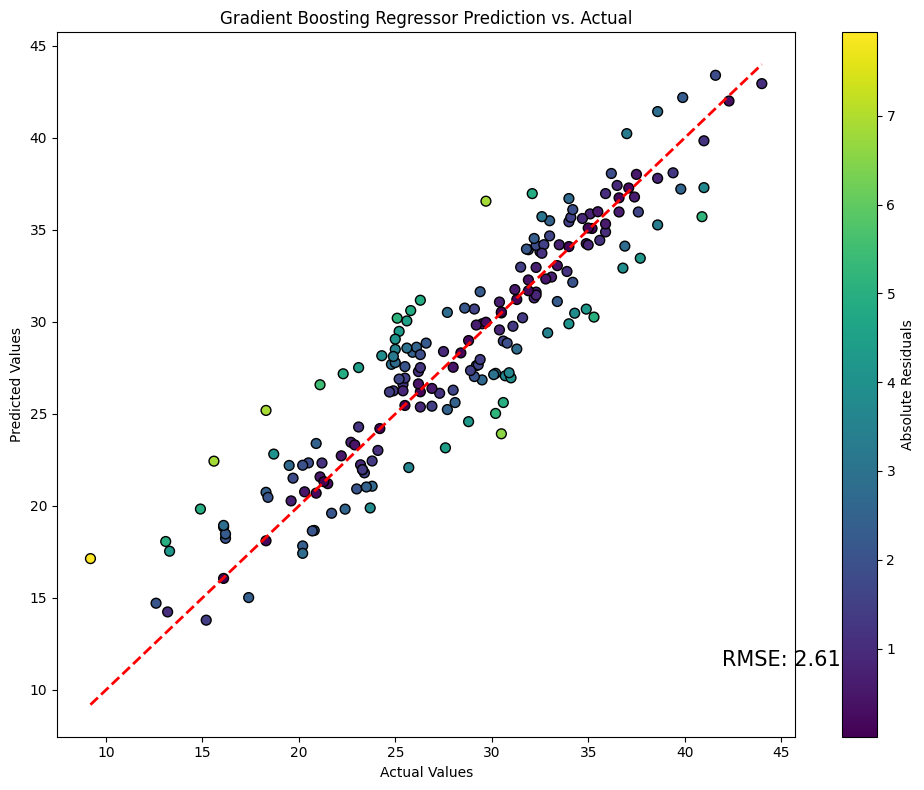

In [170]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(y_test, y_pred, c=abs(y_test - y_pred), cmap='viridis', edgecolor='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

cbar = plt.colorbar(scatter)
cbar.set_label('Absolute Residuals')

plt.text(0.9, 0.1, f'RMSE: {rmse:.2f}', fontsize=15, transform=plt.gca().transAxes)

plt.title('Gradient Boosting Regressor Prediction vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

In [171]:
index_col = comparison_df.index
index_col

Int64Index([521, 737, 740, 660, 411, 678, 626, 513, 859, 136,
            ...
            948, 829, 656, 199, 213, 408, 332, 208, 613,  78],
           dtype='int64', length=200)

In [172]:
gender = []
for i in index_col:
  gender.append(df.loc[i,'성별_F'])

comparison_df['Gender'] = gender
comparison_df

,Actual,Predicted,Gender
521,34.3,30.476600,0
737,25.6,30.057153,0
740,25.4,26.609804,0
660,20.8,18.669775,0
411,22.7,23.460607,1
...,...,...,...
408,39.4,38.106234,1
332,26.9,26.387235,1
208,27.7,25.240495,1
613,26.6,28.850874,0


In [173]:
comparison_df['diff'] = comparison_df['Actual']-comparison_df['Predicted']
comparison_df

,Actual,Predicted,Gender,diff
521,34.3,30.476600,0,3.823400
737,25.6,30.057153,0,-4.457153
740,25.4,26.609804,0,-1.209804
660,20.8,18.669775,0,2.130225
411,22.7,23.460607,1,-0.760607
...,...,...,...,...
408,39.4,38.106234,1,1.293766
332,26.9,26.387235,1,0.512765
208,27.7,25.240495,1,2.459505
613,26.6,28.850874,0,-2.250874


In [174]:
print(comparison_df['diff'].max())
print(comparison_df['diff'].min())

6.5771520319487
-7.939476136158419


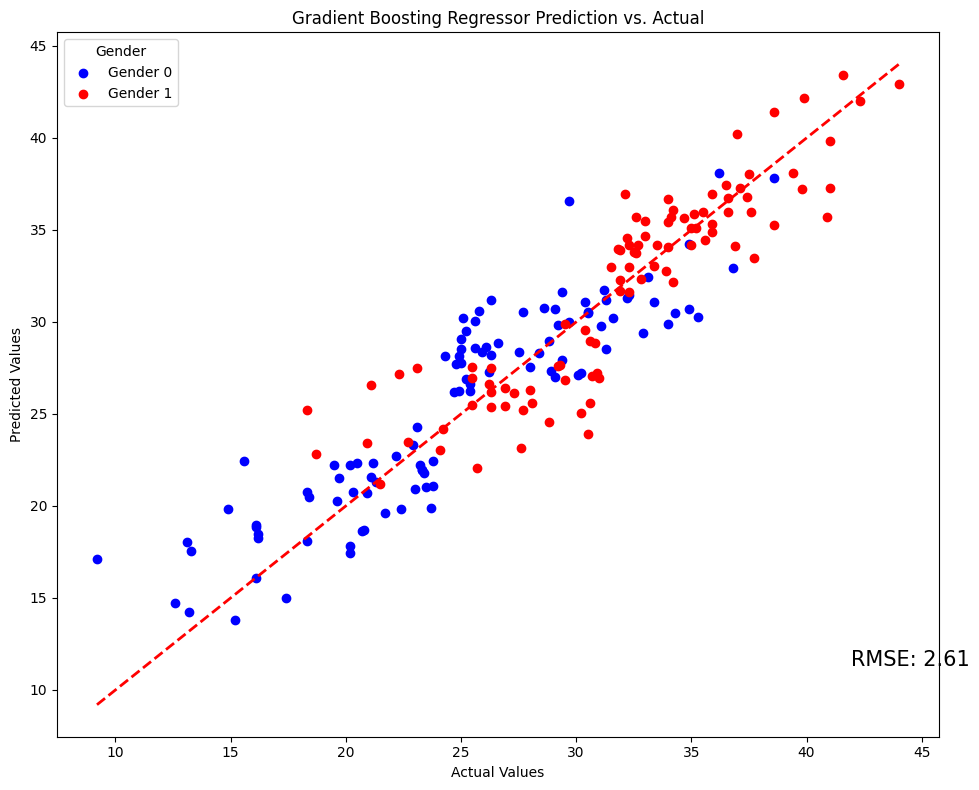

In [175]:
colors = {0: 'blue', 1: 'red'}

grouped = comparison_df.groupby('Gender')

rmse = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Predicted']))

plt.figure(figsize=(10, 8))
for key, group in grouped:
    plt.scatter(group['Actual'], group['Predicted'], label=f'Gender {key}', color=colors[key])

plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 'r--', lw=2)

plt.text(0.9, 0.1, f'RMSE: {rmse:.2f}', fontsize=15, transform=plt.gca().transAxes)

plt.title('Gradient Boosting Regressor Prediction vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

----

In [141]:
X = Robust_Onehot_scaled_data
y = data_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators = 200,
                                max_depth = 3,
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                random_state = 42)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = gbr.score(X_test, y_test)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1-r2_score)*(n-1)/(n-p-1)

rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2_score)
print()

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

Mean Squared Error (MSE): 7.040052034647842
Mean Absolute Error (MAE): 2.1313576017153735
R-squared (R²): 0.846187747034027

     Actual  Predicted
521    34.3  29.784684
737    25.6  29.800462
740    25.4  26.422423
660    20.8  17.773251
411    22.7  24.340910


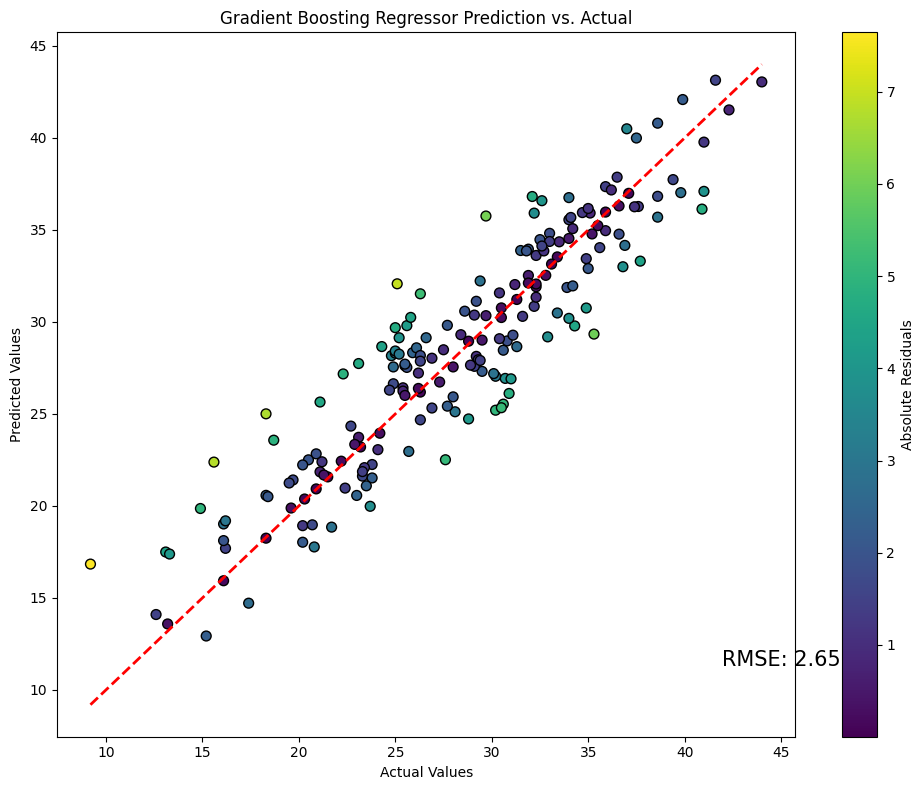

In [142]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(y_test, y_pred, c=abs(y_test - y_pred), cmap='viridis', edgecolor='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

cbar = plt.colorbar(scatter)
cbar.set_label('Absolute Residuals')

plt.text(0.9, 0.1, f'RMSE: {rmse:.2f}', fontsize=15, transform=plt.gca().transAxes)

plt.title('Gradient Boosting Regressor Prediction vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

In [143]:
index_col = comparison_df.index
index_col

Int64Index([521, 737, 740, 660, 411, 678, 626, 513, 859, 136,
            ...
            948, 829, 656, 199, 213, 408, 332, 208, 613,  78],
           dtype='int64', length=200)

In [144]:
comparison_df['diff'] = comparison_df['Actual']-comparison_df['Predicted']
comparison_df

,Actual,Predicted,diff
521,34.3,29.784684,4.515316
737,25.6,29.800462,-4.200462
740,25.4,26.422423,-1.022423
660,20.8,17.773251,3.026749
411,22.7,24.340910,-1.640910
...,...,...,...
408,39.4,37.736355,1.663645
332,26.9,28.030586,-1.130586
208,27.7,25.425094,2.274906
613,26.6,29.143172,-2.543172


In [145]:
print(comparison_df['diff'].max())
print(comparison_df['diff'].min())

5.95899580411718
-7.641928096088268


In [147]:
gender = []
for i in index_col:
  gender.append(df.loc[i,'성별_F'])

comparison_df['Gender'] = gender
comparison_df

,Actual,Predicted,diff,Gender
521,34.3,29.784684,4.515316,0
737,25.6,29.800462,-4.200462,0
740,25.4,26.422423,-1.022423,0
660,20.8,17.773251,3.026749,0
411,22.7,24.340910,-1.640910,1
...,...,...,...,...
408,39.4,37.736355,1.663645,1
332,26.9,28.030586,-1.130586,1
208,27.7,25.425094,2.274906,1
613,26.6,29.143172,-2.543172,0


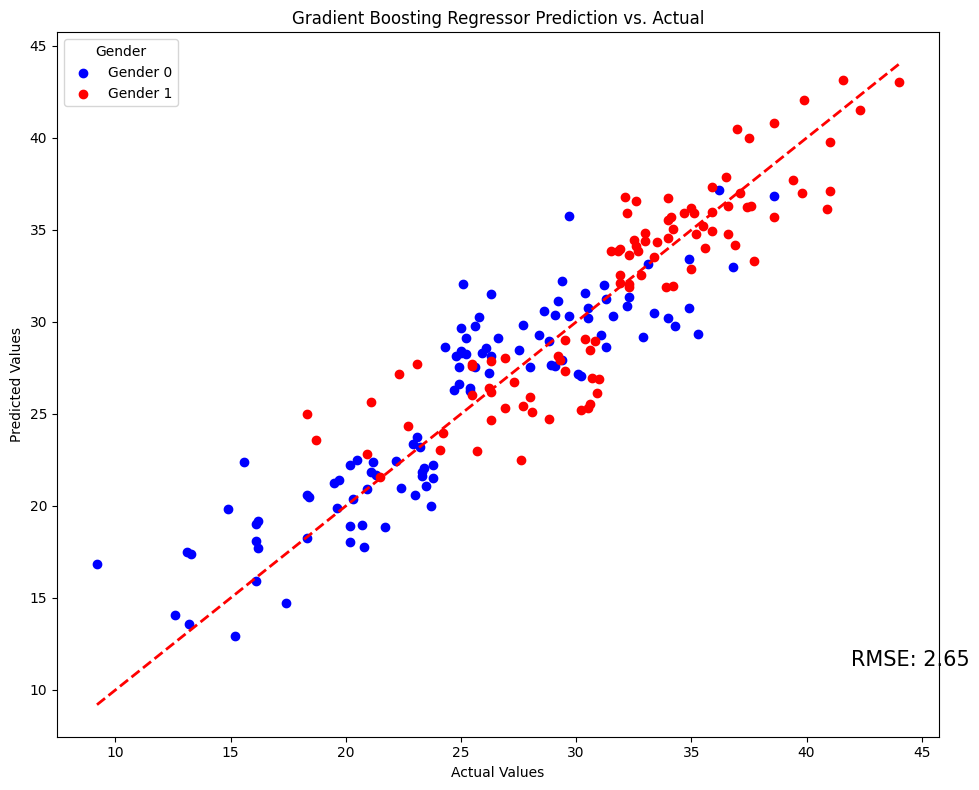

In [148]:
colors = {0: 'blue', 1: 'red'}

grouped = comparison_df.groupby('Gender')

rmse = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Predicted']))

plt.figure(figsize=(10, 8))
for key, group in grouped:
    plt.scatter(group['Actual'], group['Predicted'], label=f'Gender {key}', color=colors[key])

plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 'r--', lw=2)

plt.text(0.9, 0.1, f'RMSE: {rmse:.2f}', fontsize=15, transform=plt.gca().transAxes)

plt.title('Gradient Boosting Regressor Prediction vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

- Scaling의 문제가 아님